In [56]:
#importing Libraries

import spacy
nlp = spacy.load('en')
from spacy import displacy
nlp.remove_pipe('ner')
nlp.max_length = 93621305
import pandas as pd
import nltk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#Loading Train and Test Files
raw = open('train.txt').read()
raw_test=open('test.tag').read()


In [3]:
#making a tuple for words and tag pair
tup=[nltk.tag.str2tuple(t) for t in raw.split()]

In [4]:
#Dataframe out of truple
df=pd.DataFrame(tup,columns=['words','tags'],)

In [ ]:
df.head()

In [6]:
df.isnull()

,words,tags
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [23]:
tup_test=[nltk.tag.str2tuple(t) for t in raw_test.split()]

In [24]:
df_test=pd.DataFrame(tup_test,columns=['words','tags'],)

In [25]:
df_test

,words,tags
0,Much,QL
1,more,AP
2,than,IN
3,shelter,NN
4,",",","
5,housing,VBG
6,symbolizes,VBZ
7,social,JJ
8,status,NN
9,",",","


In [26]:
X=df['words']
y=df['tags']

In [27]:
#Spliting data
from sklearn.model_selection import train_test_split
 
 
(train_sentences, 
 test_sentences, 
 train_tags, 
 test_tags) = train_test_split(X, y, test_size=0.2)

In [28]:
words, tags = set([]), set([])
 
for s in train_sentences:
    for w in s:
        words.add(w.lower())
 
for ts in train_tags:
    for t in ts:
        tags.add(t)
 
word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0  # The special value used for padding
word2index['-OOV-'] = 1  # The special value used for OOVs
 
tag2index = {t: i + 1 for i, t in enumerate(list(tags))}
tag2index['-PAD-'] = 0  # The special value used to padding
 

In [29]:
#Converting words into number
train_sentences_X, test_sentences_X, train_tags_y, test_tags_y = [], [], [], []
 
for s in train_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    train_sentences_X.append(s_int)
 
for s in test_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    test_sentences_X.append(s_int)
 
for s in train_tags:
    train_tags_y.append([tag2index[t] for t in s])
 
for s in test_tags:
    test_tags_y.append([tag2index[t] for t in s])
 
print(train_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(test_tags_y[0])

[28]
[44, 14, 17, 19, 36, 10]
[1, 2]
[20, 20]


In [30]:

MAX_LENGTH = len(max(train_sentences_X, key=len))
print(MAX_LENGTH)

28


In [31]:
#Padding according to max lenght
from keras.preprocessing.sequence import pad_sequences
 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
train_tags_y = pad_sequences(train_tags_y, maxlen=MAX_LENGTH, padding='post')
test_tags_y = pad_sequences(test_tags_y, maxlen=MAX_LENGTH, padding='post')
 
print(train_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(test_tags_y[0])

Using TensorFlow backend.


[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]
[44 14 17 19 36 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]
[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[20 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


# Using Bi-Directional LSTM Model

In [53]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from keras.optimizers import Adam
 
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("POS-tagger_keras.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.00001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]
 
model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(Embedding(len(word2index), 128))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])
 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 28, 128)           6784      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 28, 512)           788480    
_________________________________________________________________
time_distributed_3 (TimeDist (None, 28, 36)            18468     
_________________________________________________________________
activation_3 (Activation)    (None, 28, 36)            0         
Total params: 813,732
Trainable params: 813,732
Non-trainable params: 0
_________________________________________________________________


In [33]:
#converting into category
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)
 

In [36]:
cat_train_tags_y = to_categorical(train_tags_y, len(tag2index))
print(cat_train_tags_y[0])


[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


# training Time

In [54]:

history = model.fit(train_sentences_X, to_categorical(train_tags_y, len(tag2index)),callbacks = callbacks, batch_size=32, epochs=3, validation_split=0.3)







Train on 127866 samples, validate on 54800 samples
Epoch 1/3
127866/127866 [==============================] - 2381s 19ms/step - loss: 0.1287 - acc: 0.9654 - val_loss: 0.0711 - val_acc: 0.9794

Epoch 00001: val_loss improved from inf to 0.07107, saving model to POS-tagger_keras.h5
Epoch 2/3
127866/127866 [==============================] - 2010s 16ms/step - loss: 0.0608 - acc: 0.9821 - val_loss: 0.0535 - val_acc: 0.9845

Epoch 00002: val_loss improved from 0.07107 to 0.05351, saving model to POS-tagger_keras.h5
Epoch 3/3
127866/127866 [==============================] - 2063s 16ms/step - loss: 0.0499 - acc: 0.9850 - val_loss: 0.0473 - val_acc: 0.9862

Epoch 00003: val_loss improved from 0.05351 to 0.04733, saving model to POS-tagger_keras.h5


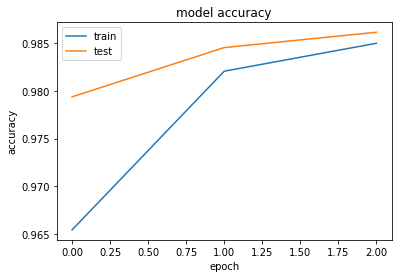

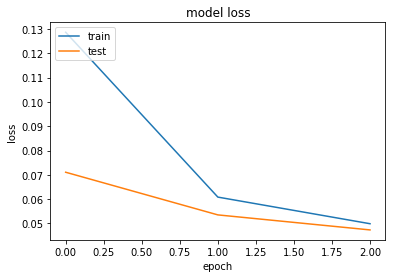

In [57]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()